# Welcome to Assignment 1 on course CV_CSL442_S21

## <span style='color:red'> ***Instructions:***</span>
#### <span style='color:red'>1. Use Python 3.x, jupyter notebook to run this notebook.</span>
#### <span style='color:red'>2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE' you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.</span>
#### <span style='color:red'>3. Read documentation of each function carefully.</span>
#### <span style='color:red'>4. Out of 7 questions we consider best 5 for the evaluation purpose.</span>
#### <span style='color:red'>5. Copying assignment solutions from others is strongly discouraged and will be considered as violation of academic code of conduct.</span>
#### <span style='color:red'>6. Early submitted assignment solutions will be considered for evaluation, so students please check your solutions carefully before submission.</span>
#### <span style='color:red'>7. Required two items for submission:</span>
    1. Solutions jupyter notebook file.
    2. Link to the recorded video of your program explanation and output demo. Try to keep the video duration minimum (preferably 10-15min).
#### <span style='color:red'>8. All the submissions should be submitted only in teams. Assignmnet due date is 15.2.2021 before 5:00PM. Late submission is accepted till 16.2.2021 before 5:00PM with 2 marks penalty from the accquired marks.</span>
#### <span style='color:blue'>***-:All the best:-***</span>

<span style='color:red'>1Q. Using basic image operations combine the scene and object images to get the composite image as shown below.</span>

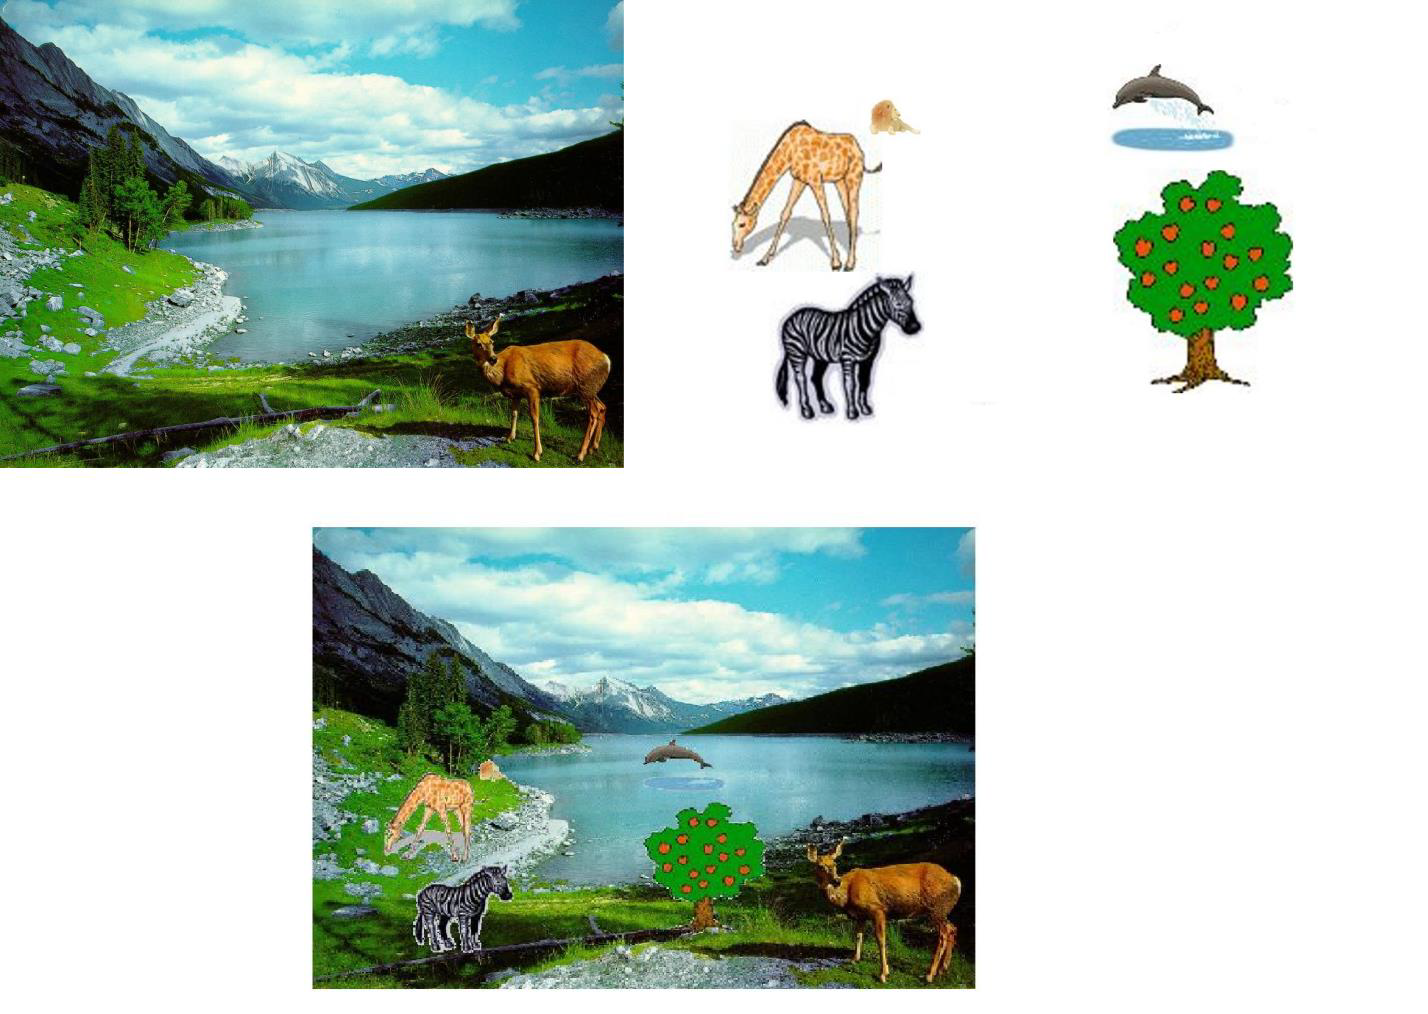

([], [])

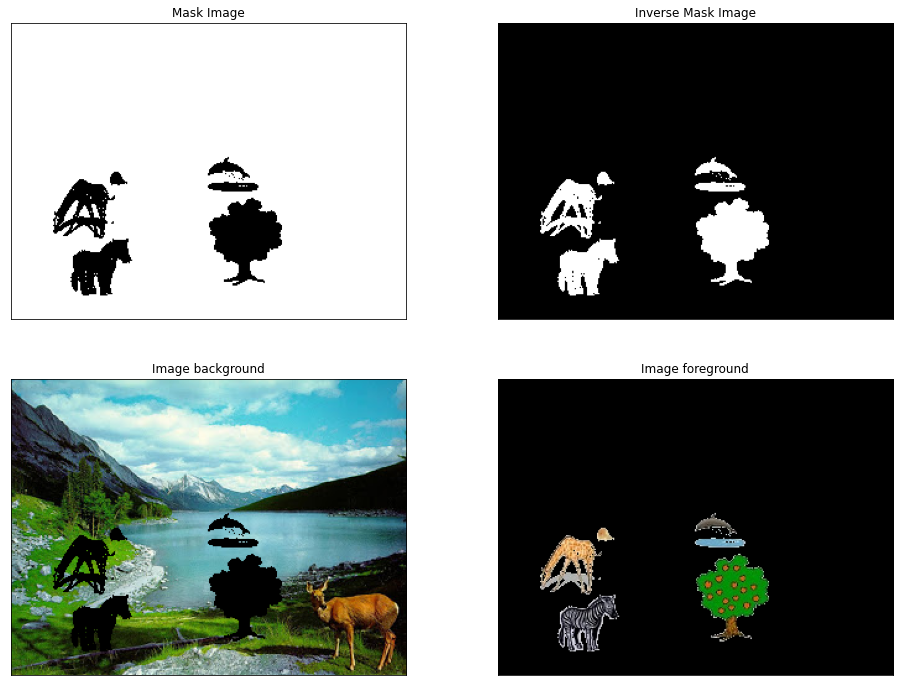

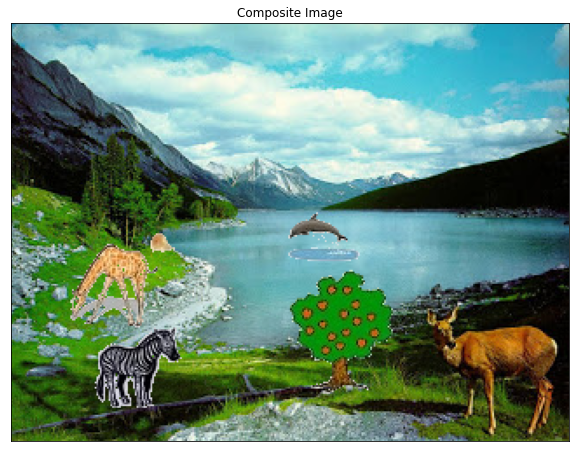

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread("Assignment-1_images\\img61.jpg")
img2 = cv2.imread("Assignment-1_images\\Sample_Image.jpg")

#YOUR CODE STARTS HERE

# convert to grayscale to get the masks using thresholding
img2g = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(img2g, 225, 255, cv2.THRESH_BINARY)
img_background = cv2.bitwise_and(img1,img1,mask=mask)

_, mask_inv = cv2.threshold(img2g, 225, 255, cv2.THRESH_BINARY_INV)
img_foreground = cv2.bitwise_and(img2,img2,mask=mask_inv)

res_img = cv2.add(img_foreground,img_background)

#YOUR CODE ENDS HERE

mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv=cv2.cvtColor(mask_inv,cv2.COLOR_BGR2RGB)
img_background=cv2.cvtColor(img_background,cv2.COLOR_BGR2RGB)
img_foreground=cv2.cvtColor(img_foreground,cv2.COLOR_BGR2RGB)
res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.title('Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(mask_inv)
plt.title('Inverse Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(img_background)
plt.title('Image background')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(img_foreground)
plt.title('Image foreground')
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
plt.imshow(res_img)
plt.title('Composite Image')
plt.xticks([])
plt.yticks([])

<span style='color:red'>2Q. Implement a function domIntensity(im, k), which takes an image im and an integer k and returns a list of k most dominant intensities of that image. Experiment your code on any 3 images to validate the program output.</span>

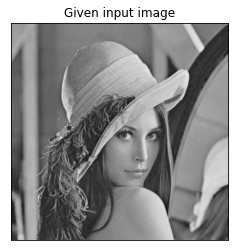

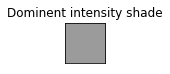

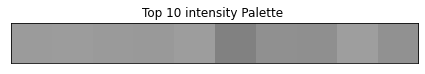

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE

    hist = cv2.calcHist([im],[0],None,[256],[0,256])
    temp = []
    sorted_intensities = []

    for i in range(256):
        temp.append([i,hist[i][0]])
        
    # sort according to number of pixels
    temp.sort(reverse = True,key = lambda x : x[1])
    for i in range(k):
        sorted_intensities.append([temp[i][0]]*3)
    
    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    # Most dominant intensity
    top_im = np.array([[list(dom_list[0])]])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[list(dom_list[i]) for i in range(k)]])
    plt.imshow(dom_inty_im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("Assignment-1_images\\lena_gray_256.tif")
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

<span style='color:red'>3Q. Write a function <span style='color:blue'>histogramEqualization(image)</span> to stretch the image contrast. Using this function enhance the images histogram1.jpg, histogram2.jpg and histogram3.jpg and compare it with inbuilt function results. Record the observations.</span> 

<Figure size 1152x864 with 0 Axes>

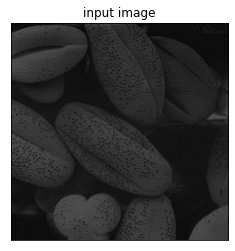

<Figure size 1152x864 with 0 Axes>

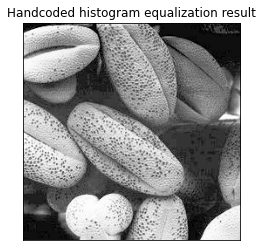

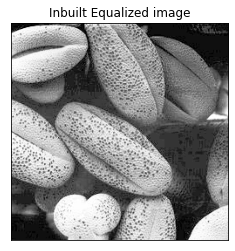

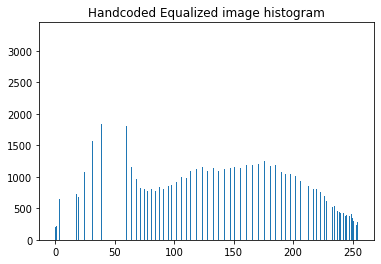

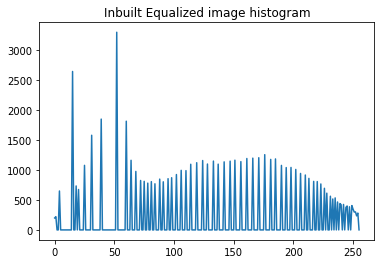

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE

#     imgHist,bins = np.histogram(im.flatten(),256,[0,256])
    imgHist = []
    
    for i in range(256):
        imgHist.append(0)
        
    for i in im:
        for j in i:
            imgHist[j] += 1

    imgHist = np.array(imgHist)

    #YOUR CODE ENDS HERE
    return imgHist

def histogramEqualization(im):
    #YOUR CODE STARTS HERE
    
#     hist,bins = np.histogram(im.flatten(),256,[0,256])
    hist = plotHistogram(im)
    cdf = hist.cumsum()
    
    # Mask an array where equal to a given value
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    # Return input as an array with masked data replaced by a fill value
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    im_new = cdf[im]

    #YOUR CODE ENDS HERE
    return im_new

he = cv2.imread('Assignment-1_images\\histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(he1)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(he)
hist=plotHistogram(eq_img)
eq_img=cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(he)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
plt.bar(range(256),hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()

<span style='color:red'>4Q.Images of outdoor scenes are often degraded by haze (due to fog, dust, etc). Light is attenuated by its passage through the atmosphere, and additional unwanted scattered light is added. We want to enhance the images to remove the effect of the haze. Look at input histograms of images “haze1.tif” and “haze2.tif”. Let’s assume that the pixels in the degraded image that have the lowest values (in each color band) actually should be pure black, and the pixels that have the highest values (in each color band) are actually should be pure white. A simple de-hazing algorithm is to take a color image, and for each band (red, green, blue), stretch its values to occupy the full range (0 to 255), such that 1% of data at the extreme ends is saturated at the low and high values (see Matlab’s “imadjust”). Then put the bands back together into an RGB image. Implement this algorithm and test it on the given images.</span>

([], [])

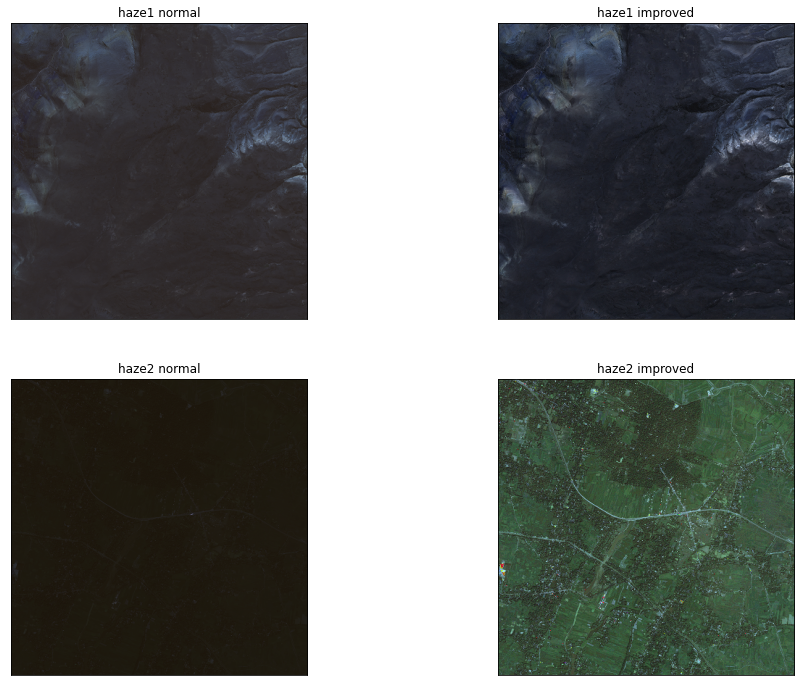

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# YOUR CODE STARTS HERE

def imadjust(img,gamma):
    minPix = float(np.min(img))
    maxPix = float(np.max(img))
    diff = float(maxPix - minPix)
    
    img_conv = img.astype(float)
    # type of linear mapping to spread the values to improve the contrast
    img_conv = ((img_conv - minPix)/(diff)**gamma)*255
    img_conv = np.uint8(img_conv)
    
    return img_conv

def adj(im,gamma):
    b,g,r = cv2.split(im)
    b = imadjust(b,gamma)
    g = imadjust(g,gamma)
    r = imadjust(r,gamma)
    im = cv2.merge((b,g,r))
    
    return im
    
haze1 = cv2.imread('Assignment-1_images\\haze1.tif')
haze2 = cv2.imread('Assignment-1_images\\haze2.tif')

haze1_new = adj(haze1,1)
haze2_new = adj(haze2,0.7)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(haze1)
plt.title('haze1 normal')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(haze1_new)
plt.title('haze1 improved')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(haze2)
plt.title('haze2 normal')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(haze2_new)
plt.title('haze2 improved')
plt.xticks([])
plt.yticks([])
    
# YOUR CODE ENDS HERE

<span style='color:red'>5Q. Try to enhance the ‘skeleton.jpg’ image by performing the sequence of operations given as comments in the program. make note of the observations in each step. </span>
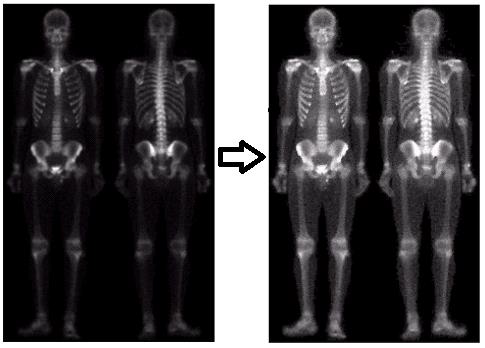

([], [])

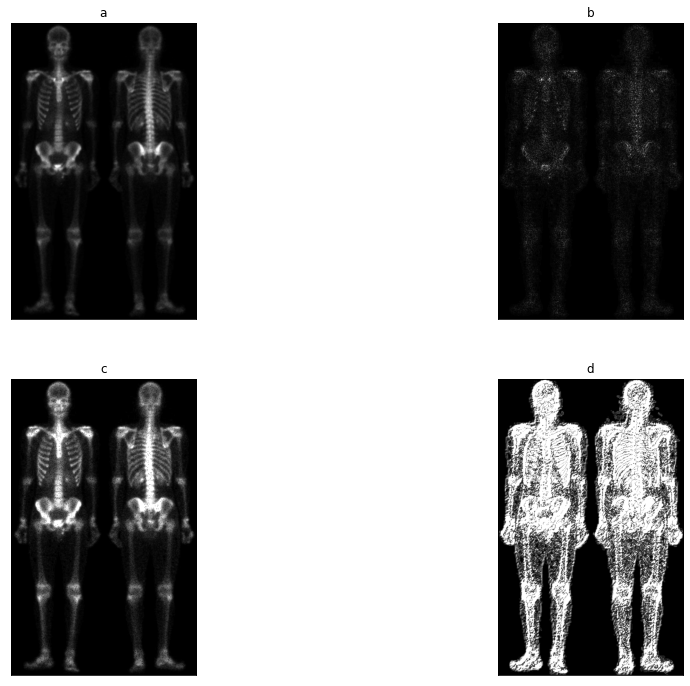

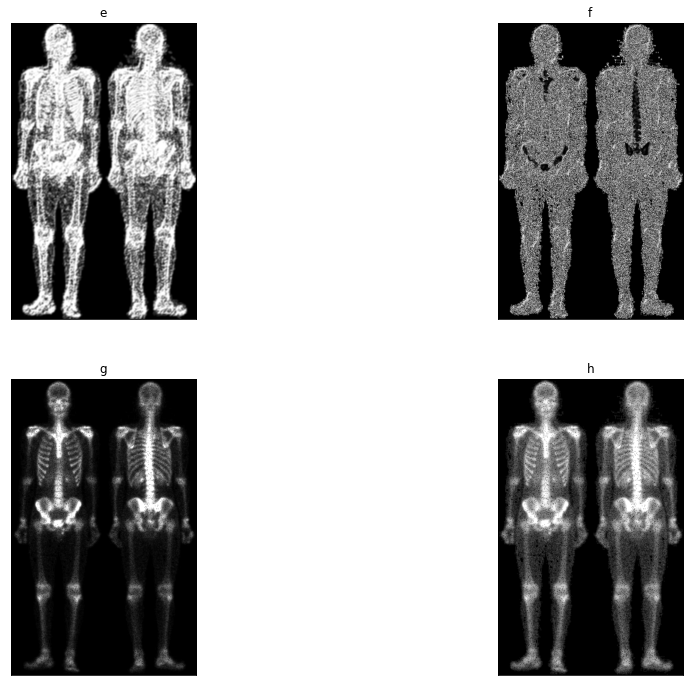

In [56]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

ddepth = cv.CV_16S

src_img_gray = cv.imread('Assignment-1_images\\skeleton.tif',0)

# to remove noise as laplacian(2nd derivative) sensitive to noise
src_img_gray = cv.GaussianBlur(src_img_gray,(3,3),0)

# positive central coeffecients are taken in the filter
lap_img = cv.Laplacian(src_img_gray,ddepth,ksize=3)
lap_img = cv.convertScaleAbs(lap_img)

# sharpening finer details
sharp_img = cv.add(src_img_gray,src_img_gray,mask=lap_img)

# ker_ver = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
# ker_hor = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# sobely = cv.filter2D(src_img_gray,-1,ker_ver) 
# sobelx = cv.filter2D(src_img_gray,-1,ker_hor)

sobelx = cv.Sobel(src_img_gray,ddepth,1,0,ksize=5)
sobely = cv.Sobel(src_img_gray,ddepth,0,1,ksize=5)

sobel_img = sobelx + sobely
sobel_img = cv.convertScaleAbs(sobel_img)

sobelSmoothed_img = cv.boxFilter(sobel_img,0,(5,5),cv.BORDER_DEFAULT)

mask_img = sharp_img*sobelSmoothed_img

# sharpening edges
sharp_img2 = cv.add(src_img_gray,src_img_gray,mask=mask_img)

# gamma < 1 to expand the darker portions and compress lighter portions
gamma = 0.5
res_img = np.array(255*(sharp_img2 / 255) ** gamma, dtype = 'uint8')

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(src_img_gray,cmap = 'gray')
plt.title('a')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(lap_img,cmap = 'gray')
plt.title('b')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(sharp_img,cmap = 'gray')
plt.title('c')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(sobel_img,cmap = 'gray')
plt.title('d')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(sobelSmoothed_img,cmap = 'gray')
plt.title('e')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(mask_img,cmap = 'gray')
plt.title('f')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(sharp_img2,cmap = 'gray')
plt.title('g')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(res_img,cmap = 'gray')
plt.title('h')
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE

<span style='color:red'>6Q. Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations.</span>

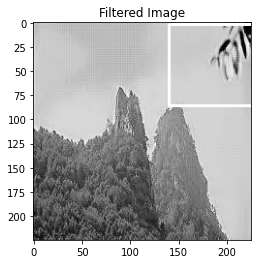

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
%matplotlib inline

# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]

    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    # YOUR CODE STARTS HERE
     
    # for getting initial value of matching value
    temp = image[0:filter_height,0:filter_width]
    
    # for storing border values of best match
    bottomRight = []
    topLeft = []
    
    maxMatch = 0
    maxMatch = np.square(np.subtract(filter_,temp)).mean()

    # iterating over every region of the shape of filter
    for i in range(image_height-filter_height):
        for j in range(image_width-filter_width):
             
            temp = image[i:i + filter_height,j:j + filter_width]
            
            # getting the Sum of Squared Difference
            tempMax = np.square(np.subtract(filter_,temp)).mean()
            if(maxMatch > tempMax):
                maxMatch = tempMax
                topLeft = [j,i]
                bottomRight = [j+filter_height,i+filter_width]
    
    cv2.rectangle(image, tuple(topLeft),tuple(bottomRight), 255, 2)
    result = image
    
    # YOUR CODE ENDS HERE
    return result



# To test your implementation, run the below code.
image = Image.open('Assignment-1_images\\hills.jpeg')
filter_ = Image.open('Assignment-1_images\\template.png')
result = linear_filter(image, filter_)

plt.imshow(result,cmap = 'gray')
plt.title('Filtered Image')
plt.show()

<span style='color:red'>7Q. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. For the given noise images. Apply the appropriate filter to enhance the image quality. use images Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.</span> 

([], [])

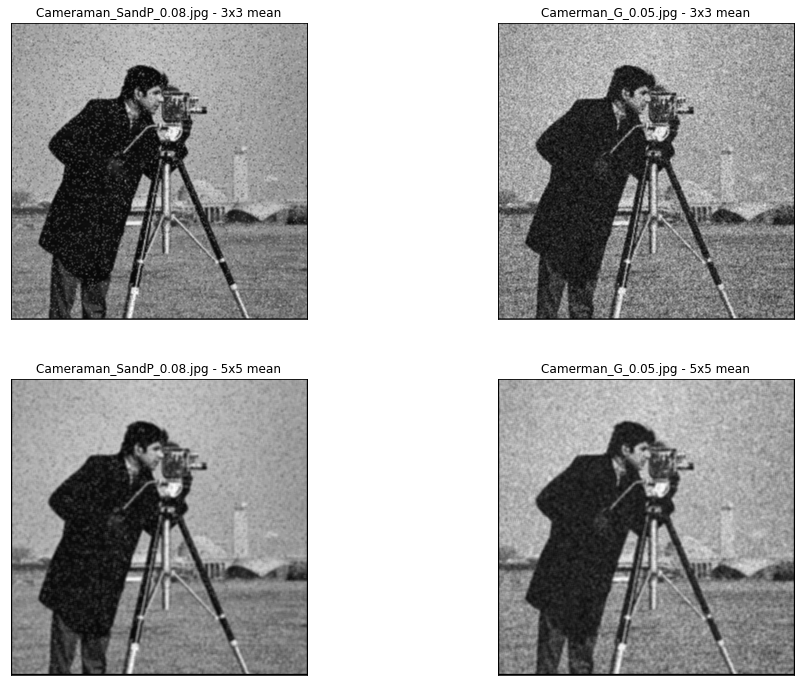

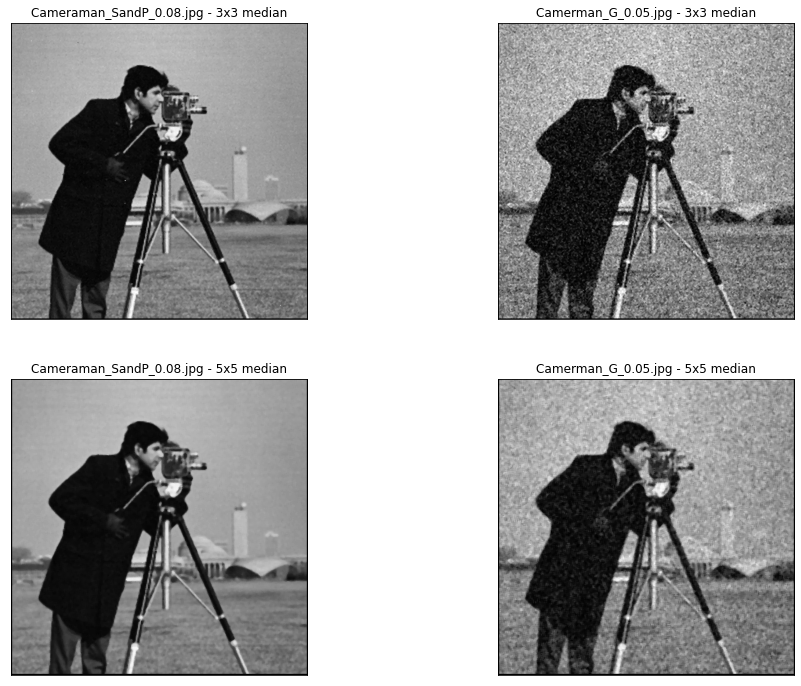

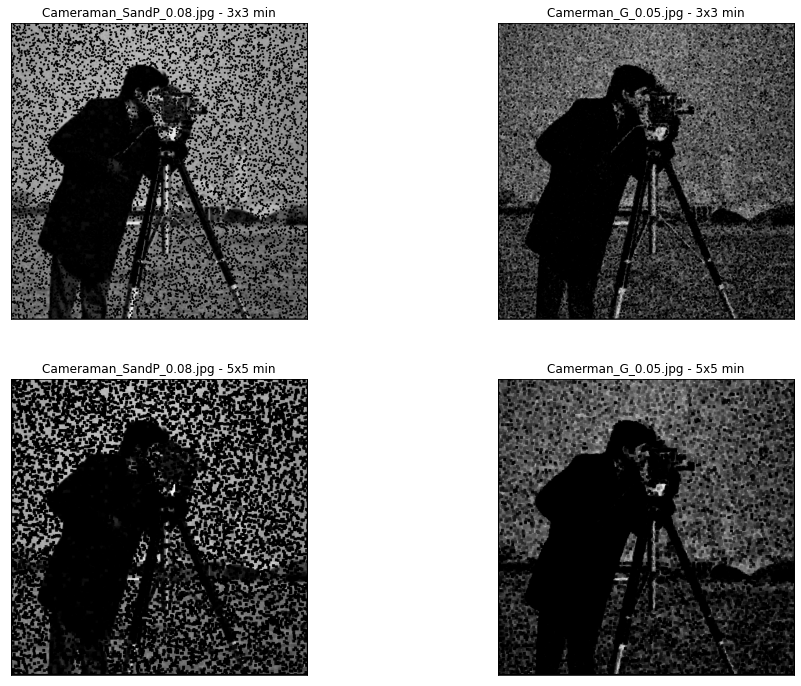

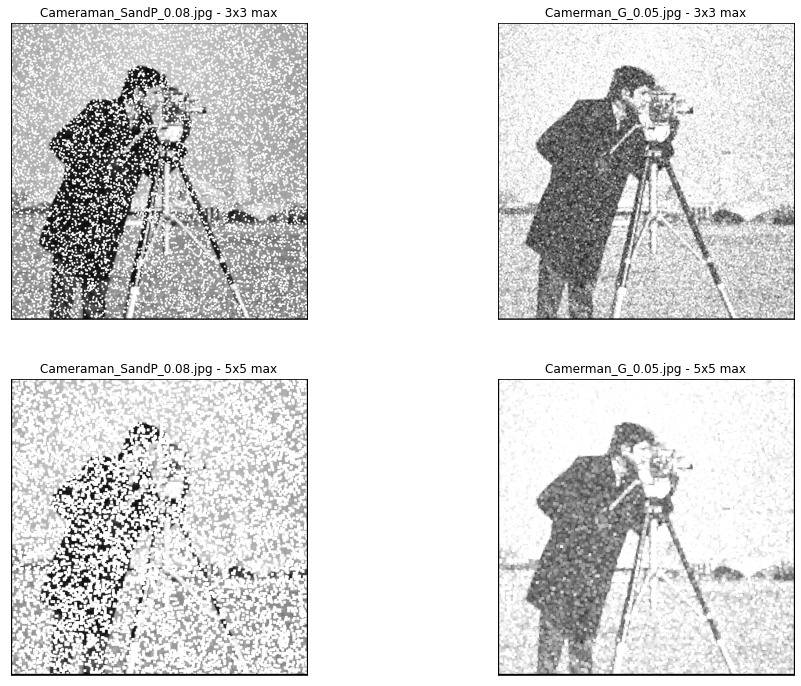

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE

def meanFilter(img,size):
    height,width = img.shape
    img_new = np.zeros(img.shape)
    mask = np.ones([size,size])/(size**2)

    # iterating over every region of the shape of filter
    for i in range(size//2,height - size//2):
        for j in range(size//2,width - size//2):
            sum = 0
            for k in range(i - size//2,i + size//2 + 1):
                for l in range(j - size//2,j + size//2 + 1):
                    sum += img[k,l]*mask[i - k,j - l]
            img_new[i,j] = sum

    img_new = img_new.astype(np.uint8)

    return img_new

def medianFilter(img,size):
    height,width = img.shape
    img_new = np.zeros(img.shape)

    # iterating over every region of the shape of filter
    for i in range(size//2,height - size//2):
        for j in range(size//2,width - size//2):
            temp = []
            for k in range(i - size//2,i + size//2 + 1):
                for l in range(j - size//2,j + size//2 + 1):
                    temp.append(img[k,l])

            temp.sort()
            img_new[i,j] = temp[(size**2)//2]

    return img_new

def minFilter(img,size):
    height,width = img.shape
    img_new = np.zeros(img.shape)

    # iterating over every region of the shape of filter
    for i in range(size//2,height - size//2):
        for j in range(size//2,width - size//2):
            min = img[i,j]
            for k in range(i - size//2,i + size//2 + 1):
                for l in range(j - size//2,j + size//2 + 1):
                    if img[k,l] < min:
                        min = img[k,l]

            img_new[i,j] = min

    return img_new

def maxFilter(img,size):
    height,width = img.shape
    img_new = np.zeros(img.shape)

    # iterating over every region of the shape of filter
    for i in range(size//2,height - size//2):
        for j in range(size//2,width - size//2):
            max = img[i,j]
            for k in range(i - size//2,i + size//2 + 1):
                for l in range(j - size//2,j + size//2 + 1):
                    if img[k,l] > max:
                        max = img[k,l]

            img_new[i,j] = max

    return img_new

img = cv2.imread('Assignment-1_images\\Cameraman_SandP_0.08.jpg',0)
img2 = cv2.imread('Assignment-1_images\\Camerman_G_0.05.jpg',0)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(meanFilter(img,3),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 3x3 mean')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(meanFilter(img2,3),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 3x3 mean')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(meanFilter(img,5),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 5x5 mean')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(meanFilter(img2,5),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 5x5 mean')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(medianFilter(img,3),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 3x3 median')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(medianFilter(img2,3),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 3x3 median')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(medianFilter(img,5),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 5x5 median')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(medianFilter(img2,5),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 5x5 median')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(minFilter(img,3),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 3x3 min')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(minFilter(img2,3),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 3x3 min')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(minFilter(img,5),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 5x5 min')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(minFilter(img2,5),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 5x5 min')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(maxFilter(img,3),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 3x3 max')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(maxFilter(img2,3),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 3x3 max')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(maxFilter(img,5),cmap = 'gray')
plt.title('Cameraman_SandP_0.08.jpg - 5x5 max')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(maxFilter(img2,5),cmap = 'gray')
plt.title('Camerman_G_0.05.jpg - 5x5 max')
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE